In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter.filedialog import askopenfilename

Criação de interface com usuário para upload de arquivo csv.

In [2]:
import tkinter as tk 
from tkinter.filedialog import askopenfilename 


def import_csv_data(): 
    global v 
    global df
    csv_file_path = askopenfilename() 
    print(csv_file_path) 
    v.set(csv_file_path) 
    df = pd.read_csv(csv_file_path,sep=';',index_col='Amostra',decimal= ',') 

root = tk.Tk() 
tk.Label(root, text='File Path').grid(row=0, column=0) 
v = tk.StringVar() 
entry = tk.Entry(root, textvariable=v).grid(row=0, column=1) 
tk.Button(root, text='Browse Data Set',command=import_csv_data).grid(row=1, column=0) 
tk.Button(root, text='Close',command=root.destroy).grid(row=1, column=1) 
root.mainloop()  

D:/Documentos/Estudo_Dirigido/dados/Dados2.csv


In [3]:
df.head()

,Obs1,Obs2,Obs3,Obs4,Obs5,Obs6
Amostra,,,,,,
1,17.81,21.11,21.94,17.36,17.98,17.56
2,16.76,19.15,16.63,21.36,22.37,23.58
3,19.69,23.79,21.61,17.83,19.67,22.27
4,16.99,17.72,20.07,20.56,21.66,22.92
5,23.92,21.30,20.57,22.26,17.52,21.62


Criação de dataframe "df_dados" para facilitar a escrita e compreensão.

In [4]:
df_dados = df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6']]

Criação da coluna "Media" com a média de cada linha.

In [5]:
df['Media'] = df_dados.mean(axis=1)

Criação da coluna "Amplitude" com a diferença do máximo e mínimo de cada linha.

In [6]:
df['Amplitude'] = df_dados.max(axis=1) - df_dados.min(axis=1)

Criação da coluna "Desvio Padrao" com o desvio padrão de cada linha.

In [7]:
df['Desvio Padrao'] = df_dados.std(axis=1)

In [8]:
df.head()

,Obs1,Obs2,Obs3,Obs4,Obs5,Obs6,Media,Amplitude,Desvio Padrao
Amostra,,,,,,,,,
1,17.81,21.11,21.94,17.36,17.98,17.56,18.960000,4.58,2.015232
2,16.76,19.15,16.63,21.36,22.37,23.58,19.975000,6.95,2.927666
3,19.69,23.79,21.61,17.83,19.67,22.27,20.810000,5.96,2.148786
4,16.99,17.72,20.07,20.56,21.66,22.92,19.986667,5.93,2.274112
5,23.92,21.30,20.57,22.26,17.52,21.62,21.198333,6.40,2.128271


Cálculo da média das médias.

In [9]:
med_media = df['Media'].mean(axis = 0)
med_media

20.304791666666667

Cálculo da média dos desvios.

In [10]:
med_desvio = df['Desvio Padrao'].mean(axis = 0)
med_desvio

1.6493282702610201

Cálculo da linha superior e inferior de controle.

In [11]:
LSC = med_media + 3 * med_desvio
LIC = med_media - 3 * med_desvio

Criação do gráfico de controle de médias.

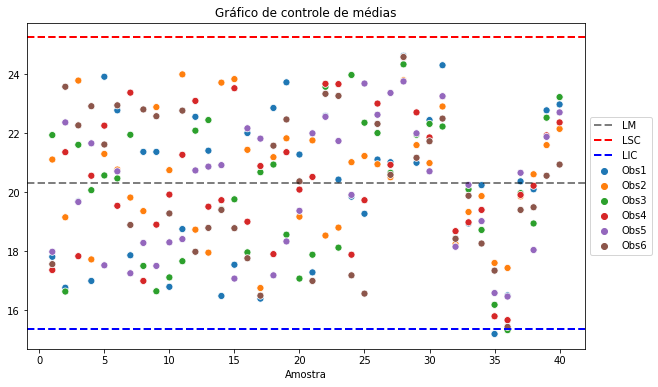

In [12]:
# Definição do tamanho da figura e seu título
plt.figure(figsize = (10,6))
plt.title('Gráfico de controle de médias')

# Plota os dados e linhas de controle
sns.scatterplot(data = df_dados, markers = ['o']*df_dados.shape[1], s = 50)
plt.axhline(med_media, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM',alpha = 0.5)
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'b', linestyle = 'dashed', linewidth = 2,label = 'LIC')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));